In [1]:
# process phase I, II LPR (120 hrs larval photomotor response)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil, time

import warnings
warnings.filterwarnings('ignore')

import sys
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"
sys.path.insert(0, util_path)

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/3_bmd_feasibility_BMD/each/Phase_I_II/LPR


In [3]:
#LPR data file
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/Phase_I_II/input/behavioral/wide/Phase_I_II_wide_t0_t239_LPR_53_54_only.csv'
lpr_all_data = pd.read_csv(complete_file_path, header = 0)

In [4]:
display(lpr_all_data.head())
#display("lpr_all_data.shape:" + str(lpr_all_data.shape))
# Convert plate ids to ints
lpr_all_data['plate.id'] = (lpr_all_data['plate.id'].values).astype(int)
display(lpr_all_data)

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,53,9289.0,A01,53_9289.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53,9289.0,A02,53_9289.0_A02,35.6,7.2,0.0,0.0,0.0,0.0,...,14.1,15.2,17.3,17.5,10.6,13.4,9.1,11.2,11.7,10.6
2,53,9289.0,A03,53_9289.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,13.9,12.9,0.0,11.5,12.9,9.2,13.1,3.0,7.9
3,53,9289.0,A04,53_9289.0_A04,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,9289.0,A05,53_9289.0_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,13.7,18.1,7.1,10.3,8.3,17.5,12.3,13.9,10.8,15.9


,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,53,9289,A01,53_9289.0_A01,50.00,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0
1,53,9289,A02,53_9289.0_A02,35.60,7.2,0.0,0.0,0.0,0.000,...,14.100,15.2,17.3,17.5,10.6,13.400,9.100,11.2,11.7,10.6
2,53,9289,A03,53_9289.0_A03,11.20,0.0,0.0,0.0,0.0,0.000,...,0.000,13.9,12.9,0.0,11.5,12.900,9.200,13.1,3.0,7.9
3,53,9289,A04,53_9289.0_A04,5.00,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0
4,53,9289,A05,53_9289.0_A05,1.00,0.0,0.0,0.0,0.0,0.000,...,13.700,18.1,7.1,10.3,8.3,17.500,12.300,13.9,10.8,15.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,54,12843,H08,54_12843.0_H08,3.56,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0
380,54,12843,H09,54_12843.0_H09,1.12,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.800,1.608,0.0,0.0,0.0
381,54,12843,H10,54_12843.0_H10,0.50,0.0,0.0,0.0,0.0,1.216,...,4.684,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0
382,54,12843,H11,54_12843.0_H11,0.10,0.0,0.0,0.0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.261,0.000,0.0,0.0,0.0


In [5]:
np.unique(lpr_all_data.well)

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       'A10', 'A11', 'A12', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06',
       'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'C01', 'C02', 'C03',
       'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12',
       'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09',
       'D10', 'D11', 'D12', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06',
       'E07', 'E08', 'E09', 'E10', 'E11', 'E12', 'F01', 'F02', 'F03',
       'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12',
       'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10', 'G11', 'G12', 'H01', 'H02', 'H03', 'H04', 'H05', 'H06',
       'H07', 'H08', 'H09', 'H10', 'H11', 'H12'], dtype=object)

In [6]:
unique_chemical_IDs = np.unique(lpr_all_data['chemical.id'])
count_wells_compounds_concentration = pd.DataFrame(columns = ['Compound', 'Concentration', 'Number_Wells'])

# Count number of wells for each chemical
for chemical_ID in unique_chemical_IDs:
    lpr_data_subset = lpr_all_data.loc[lpr_all_data['chemical.id'] == chemical_ID]
    print('\nPlates/Wells/Concentration information about compound:', chemical_ID)
    print('Plate IDs:', np.unique(lpr_data_subset['plate.id']))
    print('Number of unique plates:', len(np.unique(lpr_data_subset['plate.id'])))
    print('Concentrations tested:', np.unique(lpr_data_subset['conc']))
    print('Number of concentrations:', len(np.unique(lpr_data_subset['conc'])))
    print('Total number of wells:', lpr_data_subset.shape[0])
    for concentration_id in np.unique(lpr_data_subset['conc']):
        lpr_data_subset_concs = lpr_data_subset.loc[lpr_data_subset['conc'] == concentration_id]
        #print('Number of wells for compound ID', chemical_ID, 'and concentration', concentration_id, 'are', len((lpr_data_subset_concs['well'])))
        count_wells_compounds_concentration = count_wells_compounds_concentration.append({'Compound': chemical_ID, 'Concentration': concentration_id, 'Number_Wells': len((lpr_data_subset_concs['well']))}, ignore_index = True)


Plates/Wells/Concentration information about compound: 53
Plate IDs: [9289 9290]
Number of unique plates: 2
Concentrations tested: [ 0.   1.   5.  11.2 35.6 50. ]
Number of concentrations: 6
Total number of wells: 192

Plates/Wells/Concentration information about compound: 54
Plate IDs: [12838 12843]
Number of unique plates: 2
Concentrations tested: [0.   0.1  0.5  1.12 3.56 5.  ]
Number of concentrations: 6
Total number of wells: 192


## Load morphological data for filtering wells that have dead fish

In [7]:
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/Phase_I_II/input/morphology/after_Lisa_cleanup/wide/zf_morphology_data_335_chemicals_2020DEC16_wide_DNC_0.csv'
morphology_all_data = pd.read_csv(morph_data_file_complete_path, header = 0)
display(morphology_all_data.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRAI,CFIN,CIRC,DNC_,...,PE__,PFIN,PIG_,SM24,SNOU,SOMI,SWIM,TRUN,TR__,YSE_
0,53,9289,A01,53_9289_A01,50.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,53,9289,A02,53_9289_A02,35.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,9289,A03,53_9289_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,9289,A04,53_9289_A04,5.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,53,9289,A05,53_9289_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Goal of this box 
# -> (in lpr_all_data) leave only rows with non 1 and NA MORT

# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data
lpr_all_data['Chemical_Plate_WELL'] = lpr_all_data[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
morphology_all_data['Chemical_Plate_WELL'] = morphology_all_data[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)

morphology_nonna_data_plate_well = morphology_all_data.Chemical_Plate_WELL[~((morphology_all_data.MORT == 1) | (morphology_all_data.MORT.isnull()))]
lpr_filtered_data = lpr_all_data.loc[lpr_all_data['Chemical_Plate_WELL'].isin(list(morphology_nonna_data_plate_well.values))]

print("morphology_all_data.shape:" + str(morphology_all_data.shape))
print("morphology_nonna_data_plate_well.shape:" + str(morphology_nonna_data_plate_well.shape))

print("\nlpr_all_data.shape:" + str(lpr_all_data.shape))
print("lpr_filtered_data.shape:"+str(lpr_filtered_data.shape) + "\n")

display(morphology_nonna_data_plate_well[0:5])
print ("\n")
display(lpr_all_data.Chemical_Plate_WELL[0:5])

morphology_all_data.shape:(43483, 29)
morphology_nonna_data_plate_well.shape:(35765,)

lpr_all_data.shape:(384, 246)
lpr_filtered_data.shape:(325, 246)



1    53_9289_A02
2    53_9289_A03
3    53_9289_A04
4    53_9289_A05
6    53_9289_A07
Name: Chemical_Plate_WELL, dtype: object

0    53_9289_A01
1    53_9289_A02
2    53_9289_A03
3    53_9289_A04
4    53_9289_A05
Name: Chemical_Plate_WELL, dtype: object

In [ ]:
#(set(list(morphology_nonna_data_plate_well)) - set(list(lpr_all_data['Chemical_Plate_WELL'])))

In [ ]:
#missmatched_data = (set(list(morphology_all_data['Chemical_Plate_WELL'])) - set(list(lpr_all_data['Chemical_Plate_WELL'])))
#with open('chemicals_difference_morph_t0_t239_behav.txt', 'w') as filehandle:
#    for listitem in missmatched_data:
#        filehandle.write('%s\n' % listitem)

In [9]:
lpr_filtered_data.head()

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
1,53,9289,A02,53_9289.0_A02,35.6,7.2,0.0,0.0,0.0,0.0,...,15.2,17.3,17.5,10.6,13.4,9.1,11.2,11.7,10.6,53_9289_A02
2,53,9289,A03,53_9289.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,13.9,12.9,0.0,11.5,12.9,9.2,13.1,3.0,7.9,53_9289_A03
3,53,9289,A04,53_9289.0_A04,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53_9289_A04
4,53,9289,A05,53_9289.0_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,18.1,7.1,10.3,8.3,17.5,12.3,13.9,10.8,15.9,53_9289_A05
6,53,9289,A07,53_9289.0_A07,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,53_9289_A07


In [10]:
# Convert time resolution to minutes (if applicable)
# for LPR, 240 t something -> 24 t something

# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields
lpr_filtered_data_in_minute = lpr_filtered_data[['chemical.id', 'conc', 'plate.id', 'well']]
print ("lpr_filtered_data_in_minute.shape:\n" + str(lpr_filtered_data_in_minute.shape)) # for lpr -> (1527, 4)
#lpr_filtered_data_in_minute.head()


time_index_sec_start = 5
max_time_index_sec = 240 # from t0 to t239

#report = True
report = False

interval = "1 min"
#interval = "30 sec"
#interval = "12 sec"
print ("interval:" + str(interval))
if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/sample = 1 min/sample)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/sample = 1 min/sample)
    
for time_index in range(int(max_time_index_sec / group_size)):
    if (report):
        print ("\ntime_index:" + str(time_index))
    
    start_index = time_index_sec_start + group_size * time_index
    if (report):
        print ("start_index:" + str(start_index))
    
    end_index = start_index + group_size
    if (report):
        print ("end_index:" + str(end_index))
    
    lpr_filtered_data_in_minutes_in_this_time_index = pd.DataFrame(np.sum(lpr_filtered_data.iloc[:,start_index:end_index], axis = 1))
    #if (report):
    #    print ("lpr_filtered_data_in_minutes_in_this_time_index.shape:\n" + str(lpr_filtered_data_in_minutes_in_this_time_index.shape))
    #    display(lpr_filtered_data_in_minutes_in_this_time_index.head())
    #    display(lpr_filtered_data_in_minutes_in_this_time_index.tail())
    
    lpr_filtered_data_in_minutes_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(max_time_index_sec / group_size))])
    lpr_filtered_data_in_minute = pd.concat([lpr_filtered_data_in_minute, lpr_filtered_data_in_minutes_in_this_time_index], axis = 1)
pd.set_option('display.max_columns', None)
print ("lpr_filtered_data_in_minute.shape:\n" + str(lpr_filtered_data_in_minute.shape)) # for lpr -> (1527, 28)
#lpr_filtered_data_in_minute.head(100) # this should have only 0~23 Tns

lpr_filtered_data_in_minute['chemical_conc'] = lpr_filtered_data_in_minute[['chemical.id','conc']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#lpr_filtered_data_in_minute.head(1000) # this should have only 0~23 Tns

#lpr_filtered_data_in_minute_groupped = lpr_filtered_data_in_minute.groupby(['chemical_conc']).sum()
lpr_filtered_data_in_minute_groupped = lpr_filtered_data_in_minute.groupby(['chemical_conc']).mean()
lpr_filtered_data_in_minute_groupped.head() # this should have only 0~23 Tns

lpr_filtered_data_in_minute_groupped.to_csv('lpr_filtered_data_in_minute_groupped.csv', index=False)

lpr_filtered_data_in_minute.shape:
(325, 4)
interval:1 min
lpr_filtered_data_in_minute.shape:
(325, 28)


In [ ]:
"(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239"

# (L0,D0) 
# T1 - T60 --> 360 seconds -> 6 minutes

# (L1,D1) 
# T61 - T120 --> 360 seconds -> 6 minutes

# (L2,D2) 
# T121 - T180 --> 360 seconds -> 6 minutes

# (L3,D3) 
# T181 - T240 --> 360 seconds -> 6 minutes


lpr_filtered_data_in_minute.shape:(325, 29)


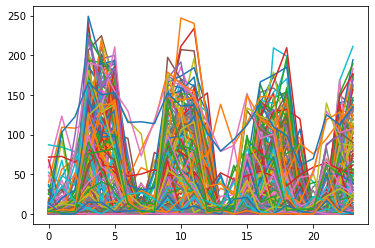

In [11]:
# Plot few lpr curves to check transition points
# Plotting to make sure that data makes sense
time_index_start = 4 # because 0-3th columns show irrelevant values
num_time_points = 24 # >= 25 will not make any difference

print ("lpr_filtered_data_in_minute.shape:" + str(lpr_filtered_data_in_minute.shape))
# lpr 1 minute interval -> (1527, 124)

fig, ax = plt.subplots()

#print (lpr_filtered_data_in_minute.iloc[10:15, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

ax.plot(np.transpose(lpr_filtered_data_in_minute.iloc[10:223,time_index_start:time_index_start + num_time_points].values));

In [17]:
delta_mov_auc = lpr_filtered_data_in_minute[['chemical.id', 'conc', 'plate.id', 'well']].copy()

#transition_points = [4,10,16,22]
# middle points of each peak -> 4,10,16,22

#transition_points = [4,10,16] # using 22 caused an error
#--> results with these transition_points tend to be NA

transition_points = [2] 
#transition_points = [3] 
# following Paritosh's example, eventually 2,8,14 etc, 
# but for now (portal establishment), only the first transition is needed.

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

#delta_mov_auc['MOV_1_2_3'] = 0 # just initial value
#delta_mov_auc['AUC_1_2_3'] = 0 # just initial value

for transition_index, transition_point in enumerate(transition_points):
    print ("\n")
    print ("transition_index:" + str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    delta_mov_auc['MOV' + str(transition_index + 1)] \
    = lpr_filtered_data_in_minute['t' + str(transition_point + 1)] \
    - lpr_filtered_data_in_minute['t' + str(transition_point)]

    delta_mov_auc['AUC' + str(transition_index + 1)] \
    = sum(lpr_filtered_data_in_minute['t' + str(transition_point + 1 + index_count)] \
          for index_count in range(num_dark)) \
    - sum(lpr_filtered_data_in_minute['t' + str(transition_point - index_count)] \
          for index_count in range(num_light))
    
    # I didn't fully understand this part, but it works as intended
    #delta_mov_auc['MOV_1_2_3'] = delta_mov_auc['MOV_1_2_3'] + delta_mov_auc['MOV' + str(transition_index + 1)]
    #delta_mov_auc['AUC_1_2_3'] = delta_mov_auc['AUC_1_2_3'] + delta_mov_auc['AUC' + str(transition_index + 1)]
    
display(delta_mov_auc.head())



transition_index:0
transition_point:2


,chemical.id,conc,plate.id,well,MOV1,AUC1
1,53,35.6,9289,A02,167.2,416.9
2,53,11.2,9289,A03,1.0,37.5
3,53,5.0,9289,A04,0.0,0.0
4,53,1.0,9289,A05,160.4,339.6
6,53,50.0,9289,A07,26.9,284.8


In [18]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())

,Chemical.ID,CONC,Plate,WELL,MOV1,AUC1
1,53,35.6,9289,A02,167.2,416.9
2,53,11.2,9289,A03,1.0,37.5
3,53,5.0,9289,A04,0.0,0.0
4,53,1.0,9289,A05,160.4,339.6
6,53,50.0,9289,A07,26.9,284.8


In [19]:
display(delta_mov_auc.tail())

,Chemical.ID,CONC,Plate,WELL,MOV1,AUC1
378,54,5.00,12843,H07,65.115,393.348
380,54,1.12,12843,H09,59.559,62.071
381,54,0.50,12843,H10,49.110,80.469
382,54,0.10,12843,H11,7.409,-4.342
383,54,0.00,12843,H12,13.217,12.753


In [20]:
import generate_dose_response_newest_no_avg as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [21]:
start_time = time.time()
os.chdir(starting_dir)

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
else:
    chemical_id_from_here = [53]

if (full_devel == "full"):
    end_points_from_here = ['MOV1','AUC1']
else:
    end_points_from_here = ['MOV1']
    #end_points_from_here = ['MOV1_2_3']

#report = True
report = False

for chemical_id in chemical_id_from_here:
    if (report): print("chemical_id:" + str(chemical_id))
    for end_point in end_points_from_here:
        if (report): print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        #print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        #print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        #print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        if (report): print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took
# 7 chemicals and 2 endpoints (['MOV1','AUC1']), 6 minutes took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()

may_need_to_be_calculated:False
may_need_to_be_calculated:False
may_need_to_be_calculated:False
may_need_to_be_calculated:False
Done, it took:106.4 seconds
